# Extension to [GMR16]
Here we develop the code and the to obtain the lower bound in [GMR16] and then use our counting to improvo on it

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def H(p):
    if (p == 1 or p == 0):
        return 0
    return -p*np.log2(p)-(1-p)*np.log2(1-p)

The counting requires the maximimization of
\begin{align*}
f_{GMR}(n,r) = \binom{n}{d}^2\binom{n}{r-2d}|\Sigma|^{r-d} \approx 2^{n\left[2H(\delta)+H(\beta-2\delta)+(\beta-\delta)\log_2{|\Sigma|}\right]}
\end{align*}

In [2]:
def f_GMR(beta,delta,sigma=4):
    return 2*H(delta)+H(beta-2*delta)+(beta-delta)*np.log2(sigma)

The maximization if for $0\leq \delta\leq \beta/2$ and $0\leq \beta \leq 1$

In [3]:
def delta_star_GMR(beta):
    deltas = np.linspace(0,beta/2,99)
    return deltas[np.argmax([f_GMR(beta,delta) for delta in deltas])]

Now we have the vector of $\delta^*(\beta)$ in we can used them to solve the equation
\begin{align*}
2H(\delta^*(\beta)) + H(\beta-2\delta^*(\beta)) + (\beta-\delta^*(\beta)-2)\log_2{|\Sigma|} - 0
\end{align*}

In [4]:
def h_GMR(b,sigma=4):
    return f_GMR(b,delta_star_GMR(b),sigma) - np.log2(sigma)

We now use the *Newton* method from scipy library

In [5]:
from scipy.optimize import newton
xstar_GMR = newton(h_GMR,0.25)
print("beta* = {0:.5f} is the [GMR16] lower bound to alpha".format(xstar_GMR))

beta* = 0.33832 is the [GMR16] lower bound to alpha


This is the same value given in [GMR16]. We can use the same procedure to find the value of $\beta^*$ given by our counting where
\begin{align*}
f_{BS}(n,r) = \binom{n}{d}^2\binom{n-d}{r-2d}|\Sigma|^{d}(|\Sigma|-1)^{r-2d} \approx
    2^{n\left[ 2H(\delta)+(1-\delta)H\left(\frac{\beta-2\delta}{1-\delta}\right)+\delta\log_2{|\Sigma|} + (\beta-2\delta)\log_2{(|\Sigma|-1)}\right]}
\end{align*}
The value of $\beta^*$ could be found by solving the equation
\begin{align*}
2H(\delta)+(1-\delta)H\left(\frac{\beta-2\delta}{1-\delta}\right)+\delta\log_2{|\Sigma|}+ (\beta-2\delta)\log_2{(|\Sigma|-1)} - \log_2{|\Sigma|} = 0
\end{align*}
where (as above) $\delta$ is in fact a function $\delta^*(\beta)$ obtained by maximization.

In [28]:
def f_BS(beta,delta,sigma=4):
    return 2*H(delta)+(1-delta)*H((beta-2*delta)/(1-delta))+delta*np.log2(sigma)+(beta-2*delta)*np.log2(sigma-1)
#def f_BS(beta,delta,sigma=4):
#    return 2*H(delta)+(1-delta)*H((beta-2*delta)/(1-delta))+(beta)*np.log2(sigma-1)
def delta_star_BS(beta,sigma=4):
    deltas = np.linspace(0,beta/2,99)
    return deltas[np.argmax([f_BS(beta,delta,sigma) for delta in deltas])]
def h_BS(b,sigma=4):
    return f_BS(b,delta_star_BS(b),sigma) - np.log2(sigma)
xstar_BS = newton(h_BS, 0.25)
print("beta* = {0:.5f} is the [BS] lower bound to alpha".format(xstar_BS))

beta* = 0.35978 is the [BS] lower bound to alpha


thus, if the reasoning can be applied, our bound improves the previous one leading to $\alpha\geq\beta^*\approx 0.3598$. It should be notices that this value is very close to the numerical values we obtained when running the counting explicitly.

In [30]:
hh = lambda beta: h_BS(beta,2)
xs2 = newton(hh, 0.1)
print(xs2)

0.17421246588138967


For the binary alphabet the above function becomes
\begin{align*}
2H(\delta) + (1-\delta)H\left(\frac{\beta-2\delta}{1-\delta}\right) + \delta - 1 = 0
\end{align*}

In [31]:
def f_BS_binary(beta,delta):
    return 2*H(delta)+(1-delta)*H((beta-2*delta)/(1-delta)) + delta
def delta_star_BS_binary(beta):
    deltas = np.linspace(0,beta/2,99)
    return deltas[np.argmax([f_BS_binary(beta,delta) for delta in deltas])]
def h_BS_binary(b):
    return f_BS_binary(b,delta_star_BS_binary(b)) - 1
xstar_BS_binary = newton(h_BS_binary, 0.1)
print("beta* = {0:.5f}".format(xstar_BS_binary))

beta* = 0.17055


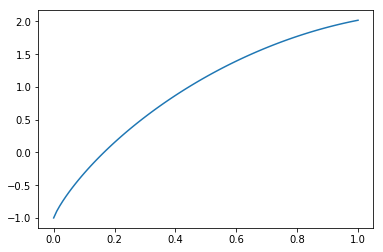

In [17]:
betas = np.linspace(0,1,100)
plt.plot(betas, [h_BS_binary(b) for b in betas])

## The bound using summation
The above method relies on the work in [GMR16], however it is not clear whether this methodology is correct (although the numerical result may be correct nonetheless). A more conservative approach substitute the maximum with the sum over $d$, this will inevitably decreas the value of $\beta^*$. For our counting we shown that the equation to be solved is 
\begin{align*}
2H(\delta)+(1-\delta)H\left(\frac{\beta-2\delta}{1-\delta}\right)+ \beta\log_2{(|\Sigma|-1)} - \log_2{|\Sigma|} = 0
\end{align*}
holding for $|\Sigma|\geq 3$

In [7]:
def f2_BS(beta,delta,sigma=4):
    return 2*H(delta)+(1-delta)*H((beta-2*delta)/(1-delta))+beta*np.log2(sigma-1)
def delta_star2_BS(beta):
    deltas = np.linspace(0,beta/2,99)
    return deltas[np.argmax([f2_BS(beta,delta) for delta in deltas])]
def h2_BS(b,sigma=4):
    return f2_BS(b,delta_star2_BS(b),sigma) - np.log2(sigma)
xstar2_BS = newton(h2_BS, 0.25)
print("beta* = {0:.5f} is the conservative [BS] lower bound to alpha".format(xstar2_BS))

beta* = 0.32926 is the conservative [BS] lower bound to alpha


This value stays in between the bound in [GMR16] and the version of our bound we would obtain if we apply [GMR16] method to our counting. In both cases we improve the results in [GMR16] either because we give a tighter bound or because we improve on the simple (yet verfied) bound that is given in [GMR16].

## Some analysis of the exponent functions

Our argument proving that above bounds are valid relies on the findind the $\sup$, we first if such value is the one that makes the exponent $0$, in other words we study the monotonocity of the exponent functions.

Starting with the *insertion distance* bound
\begin{align*}
f_{ID}(n,r) = \binom{n}{r}^2 |\Sigma|^r
\end{align*}
This leads to the exponent function
\begin{align*}
g_{ID}(\beta) - \log_2{|\Sigma|} = 2H(\beta) + (\beta-1)\log_2{|\Sigma|}
\end{align*}

In [ ]:
def h_ID(beta, sigma=4):
    return 2*H(beta) + (beta-1)*np.log2(sigma) 

In [ ]:
betas = np.linspace(0,1)
g_ID = [h_ID(beta) for beta in betas]
g_GMR = [h_GMR(beta) for beta in betas]
g_BS = [h_BS(beta) for beta in betas]
plt.plot(betas, g_GMR, "--", label="[GMR16]")
plt.plot(betas, g_BS, label="[BS]")
plt.plot(betas, g_ID, ":", label="[ID]")
plt.grid(True)
plt.legend()
plt.xlim([0,1])
plt.xlabel(r"$\beta$")
plt.ylabel(r"$g(\beta)$")
#plt.savefig("/tmp/g_graphs.pdf")

In [ ]:
def f_CP(beta, delta, sigma=4):
    return (beta-2*delta)*np.log2(sigma-1) + delta*np.log2(sigma) + np.min([2*delta,1-beta+delta]) + H((beta-2*delta)/(1-delta)) + H((2*delta)/(1-beta+3*delta))
def delta_star_CP(beta):
    deltas = np.linspace(0,beta/2,99)
    return deltas[np.argmax([f_CP(beta,delta) for delta in deltas])]
def h_CP(b,sigma=4):
    return f_CP(b,delta_star_CP(b),sigma) - np.log2(sigma)
xstar_CP = newton(h_CP, 0.25)
print("beta* = {0:.5f} is the rough approximated [CP] lower bound to alpha".format(xstar_CP))

In [ ]:
betas = np.linspace(0,1)
g_ID = [h_ID(beta) for beta in betas]
g_GMR = [h_GMR(beta) for beta in betas]
g_BS = [h_BS(beta) for beta in betas]
g_CP = [h_CP(beta) for beta in betas]
plt.plot(betas, g_GMR, "--", label="[GMR16]")
plt.plot(betas, g_BS, label="[BS]")
plt.plot(betas, g_ID, ":", label="[ID]")
plt.plot(betas, g_CP, ".", label="[CP]")
plt.grid(True)
plt.legend()
plt.xlim([0,1])
plt.xlabel(r"$\beta$")
plt.ylabel(r"$g(\beta)$")